<a href="https://colab.research.google.com/github/JesseJames50/python_economia/blob/main/compara%C3%A7%C3%A3o_moedas_latinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Obter dados históricos do índice DXY (Dólar Americano)
dxy = yf.download('DX-Y.NYB', start='2000-01-01', end='2024-12-31')

# Verificar os dados baixados
dxy.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,101.669998,101.830002,100.190002,100.220001,100.220001,0
2000-01-04,100.550003,100.860001,100.010002,100.410004,100.410004,0
2000-01-05,100.419998,100.470001,99.709999,100.379997,100.379997,0
2000-01-06,100.309998,100.809998,99.809998,100.650002,100.650002,0
2000-01-07,100.489998,100.930000,100.440002,100.800003,100.800003,0


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


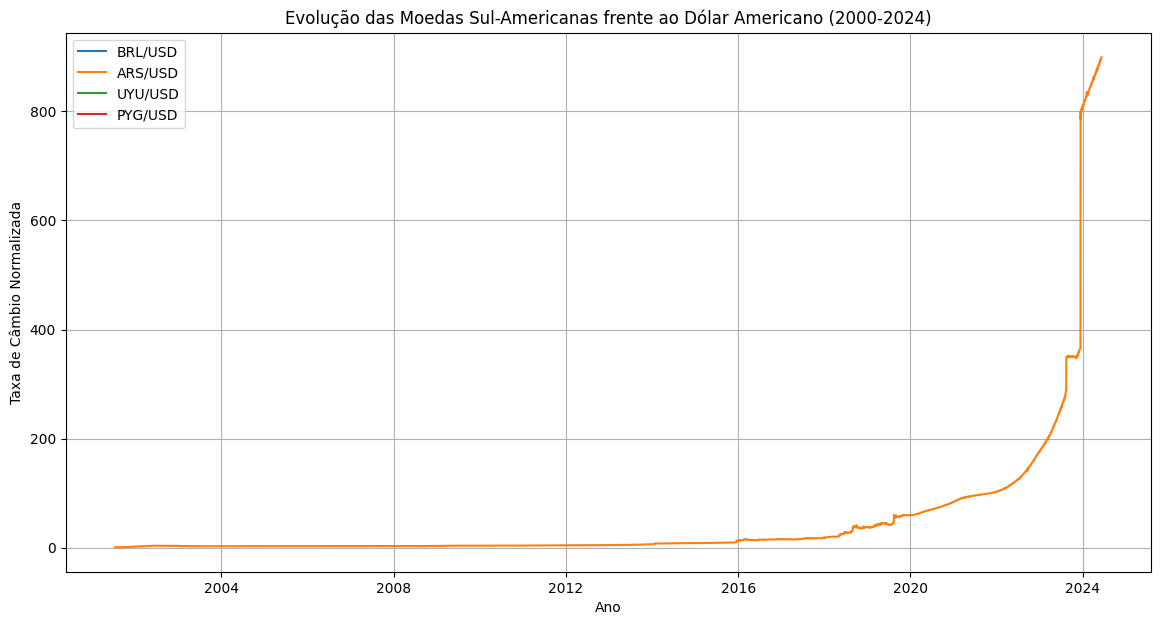

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Função para obter dados históricos de câmbio do yfinance
def get_currency_data(ticker, start='2000-01-01', end='2024-12-31'):
    df = yf.download(ticker, start=start, end=end)[['Adj Close']].copy()
    df.rename(columns={'Adj Close': ticker}, inplace=True)
    return df

# Obter dados de câmbio para as moedas
brl_usd = get_currency_data('BRL=X')
ars_usd = get_currency_data('ARS=X')
uyu_usd = get_currency_data('UYU=X')
pyg_usd = get_currency_data('PYG=X')

# Consolidar dados em um único DataFrame
data = pd.concat([brl_usd, ars_usd, uyu_usd, pyg_usd], axis=1)

# Remover valores anômalos (outliers)
data = data[data > 0]

# Preenchendo valores faltantes
data = data.fillna(method='ffill')

# Normalizar os dados
data_normalized = data / data.iloc[0]

# Plotar a evolução das moedas frente ao dólar (normalizado)
plt.figure(figsize=(14, 7))
plt.plot(data_normalized.index, data_normalized['BRL=X'], label='BRL/USD')
plt.plot(data_normalized.index, data_normalized['ARS=X'], label='ARS/USD')
plt.plot(data_normalized.index, data_normalized['UYU=X'], label='UYU/USD')
plt.plot(data_normalized.index, data_normalized['PYG=X'], label='PYG/USD')
pen_usd = get_currency_data('USDPEN=X', start='2000-01-01')
plt.xlabel('Ano')
plt.ylabel('Taxa de Câmbio Normalizada')
plt.title('Evolução das Moedas Sul-Americanas frente ao Dólar Americano (2000-2024)')
plt.legend()
plt.grid(True)
plt.show()



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Dados consolidados head:             BRL=X  ARS=X  UYU=X  PYG=X  USDPEN=X
Date                                            
2001-05-31    NaN    NaN    NaN    NaN     3.623
2001-06-01    NaN    NaN    NaN    NaN     3.623
2001-06-04    NaN    NaN    NaN    NaN     3.623
2001-06-05    NaN    NaN    NaN    NaN     3.623
2001-06-06    NaN    NaN    NaN    NaN     3.623


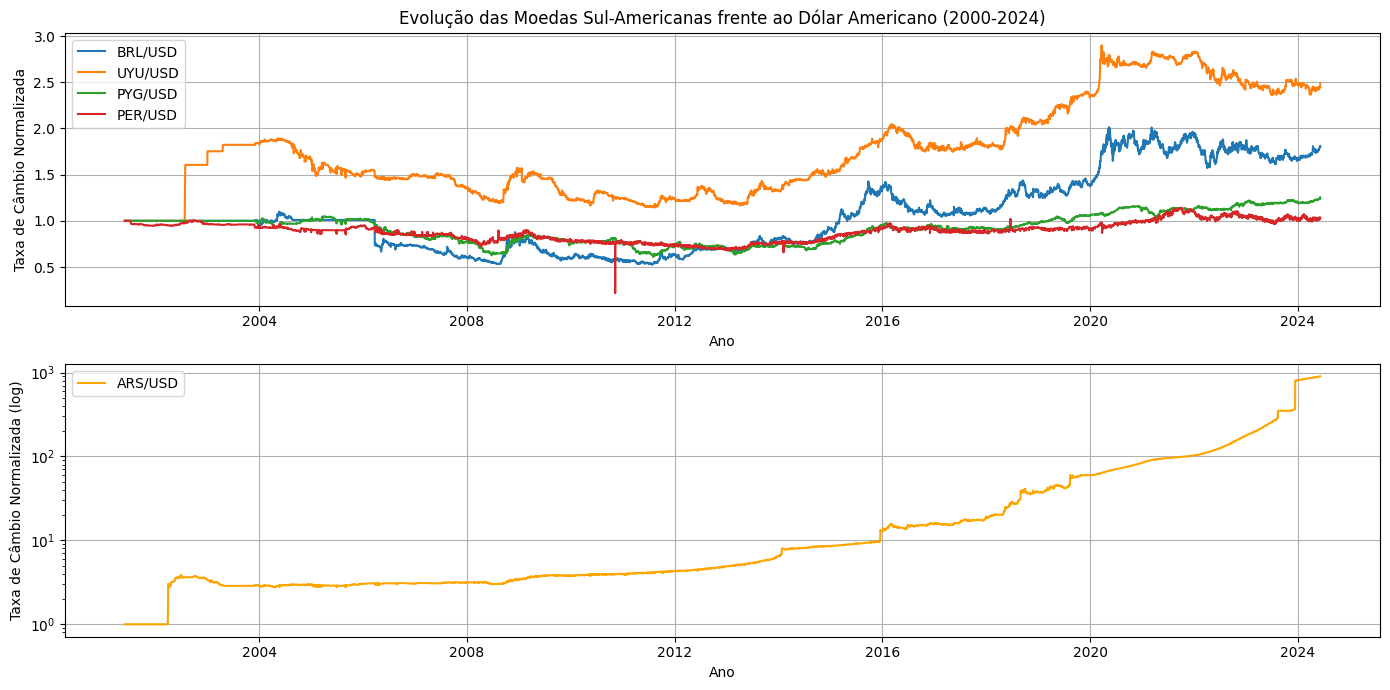

In [2]:
# Evolução das Moedas Sul-Americanas frente ao Dólar Americano (2000-2024)
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Função para obter dados históricos de câmbio do yfinance
def get_currency_data(ticker, start='2000-01-01', end='2024-12-31'):
    df = yf.download(ticker, start=start, end=end)[['Adj Close']].copy()
    df.rename(columns={'Adj Close': ticker}, inplace=True)
    return df

# Obter dados de câmbio para as moedas
brl_usd = get_currency_data('BRL=X', start='2000-01-01')
ars_usd = get_currency_data('ARS=X', start='2000-01-01')
uyu_usd = get_currency_data('UYU=X', start='2000-01-01')
pyg_usd = get_currency_data('PYG=X', start='2000-01-01')
pen_usd = get_currency_data('USDPEN=X', start='2000-01-01')

# Consolidar dados em um único DataFrame
data = pd.concat([brl_usd, ars_usd, uyu_usd, pyg_usd, pen_usd], axis=1)

# Verificar o DataFrame consolidado
print("Dados consolidados head:", data.head())

# Preenchendo valores faltantes para garantir continuidade
data = data.fillna(method='ffill').fillna(method='bfill')

# Normalizar os dados
data_normalized = data / data.iloc[0]

# Separar dados das moedas com alta volatilidade (ARS)
data_normalized_high_volatility = data_normalized[['ARS=X']]
data_normalized_other = data_normalized.drop(columns=['ARS=X'])

# Plotar a evolução das moedas frente ao dólar (normalizado)
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data_normalized_other.index, data_normalized_other['BRL=X'], label='BRL/USD')
plt.plot(data_normalized_other.index, data_normalized_other['UYU=X'], label='UYU/USD')
plt.plot(data_normalized_other.index, data_normalized_other['PYG=X'], label='PYG/USD')
plt.plot(data_normalized_other.index, data_normalized_other['USDPEN=X'], label='PER/USD')
plt.xlabel('Ano')
plt.ylabel('Taxa de Câmbio Normalizada')
plt.title('Evolução das Moedas Sul-Americanas frente ao Dólar Americano (2000-2024)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(data_normalized_high_volatility.index, data_normalized_high_volatility['ARS=X'], label='ARS/USD', color='orange')
plt.xlabel('Ano')
plt.ylabel('Taxa de Câmbio Normalizada (log)')
plt.yscale('log')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [3]:
data

,BRL=X,ARS=X,UYU=X,PYG=X,USDPEN=X
Date,,,,,
2001-05-31,2.9230,0.999400,15.615000,5994.600098,3.623000
2001-06-01,2.9230,0.999400,15.615000,5994.600098,3.623000
2001-06-04,2.9230,0.999400,15.615000,5994.600098,3.623000
2001-06-05,2.9230,0.999400,15.615000,5994.600098,3.623000
2001-06-06,2.9230,0.999400,15.615000,5994.600098,3.623000
...,...,...,...,...,...
2024-06-03,5.2444,894.222778,38.176376,7413.308594,3.674695
2024-06-04,5.2490,896.545166,38.149952,7402.250000,3.737000
2024-06-05,5.2877,897.011475,38.250435,7406.180664,3.729000


[*********************100%%**********************]  1 of 1 completed


Dados consolidados head:             BRL=X
Date             
2003-12-01  2.923
2003-12-02  2.931
2003-12-03  2.931
2003-12-04  2.943
2003-12-05  2.934


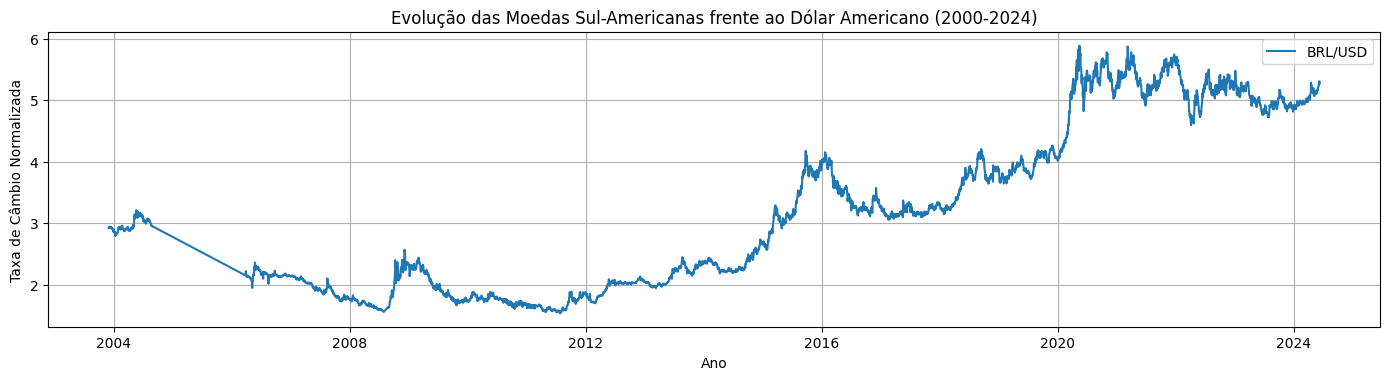

In [4]:
#Apenas moeda brasileira
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Função para obter dados históricos de câmbio do yfinance
def get_currency_data(ticker, start='2000-01-01', end='2024-12-31'):
    df = yf.download(ticker, start=start, end=end)[['Adj Close']].copy()
    df.rename(columns={'Adj Close': ticker}, inplace=True)
    return df

# Obter dados de câmbio para as moedas
brl_usd = get_currency_data('BRL=X', start='2000-01-01')

# Consolidar dados em um único DataFrame
data = pd.concat([brl_usd], axis=1)

# Verificar o DataFrame consolidado
print("Dados consolidados head:", data.head())

# Preenchendo valores faltantes para garantir continuidade
data = data.fillna(method='ffill').fillna(method='bfill')

# Normalizar os dados
data_normalized = data



# Plotar a evolução das moedas frente ao dólar (normalizado)
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data_normalized.index, data_normalized['BRL=X'], label='BRL/USD')
plt.xlabel('Ano')
plt.ylabel('Taxa de Câmbio Normalizada')
plt.title('Evolução das Moedas Sul-Americanas frente ao Dólar Americano (2000-2024)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()